<span>
<img src="http://www.sobigdata.eu/sites/default/files/logo-SoBigData-DEFINITIVO.png" width="180px" align="right"/>
</span>
<span>
**Author:** Giulio Rossetti (giulio.rossetti@gmail.com)<br/>
**Python version:**  3.6<br/>
**Last update:** 22/03/2018
</span>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk # data mining tools
import matplotlib.pylab as plt # plotting
import seaborn as sns # advanced plotting
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")

## 1. Dataset description
As first step we load the whole Iris Dataset and make confidence with its features...

In [2]:
iris = pd.read_csv("data/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<a id='transform'></a>
## 2. Data Transformation
In this stage, we will clean our data by 
 1. handling missing information, 
 2. creating new features for analysis, and 
 3. converting fields to the correct format for calculations and presentation.

#### Missing values

In [3]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [5]:
iris['sepal_length'].fillna(iris['sepal_length'].median(), inplace = True)

#### Feature creation

In [6]:
iris['New_Column'] = iris['sepal_length'] * 100

In [42]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_code
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


#### Binning continuos variables

In [8]:
iris['sepal_length_bin'] = pd.qcut(iris['sepal_length'], 4) # qcut: frequency bins
iris['sepal_width_bin'] = pd.cut(iris['sepal_width'].astype(int), 5) # cut: equal size value bins

iris[['sepal_length', 'sepal_length_bin', 'sepal_width', 'sepal_width_bin']].head()

,sepal_length,sepal_length_bin,sepal_width,sepal_width_bin
0,5.1,"(4.2989999999999995, 5.1]",3.5,"(2.8, 3.2]"
1,4.9,"(4.2989999999999995, 5.1]",3.0,"(2.8, 3.2]"
2,4.7,"(4.2989999999999995, 5.1]",3.2,"(2.8, 3.2]"
3,4.6,"(4.2989999999999995, 5.1]",3.1,"(2.8, 3.2]"
4,5.0,"(4.2989999999999995, 5.1]",3.6,"(2.8, 3.2]"


In [9]:
iris['sepal_length_bin'].value_counts()

(4.2989999999999995, 5.1]    41
(5.1, 5.8]                   39
(6.4, 7.9]                   35
(5.8, 6.4]                   35
Name: sepal_length_bin, dtype: int64

In [10]:
iris['sepal_width_bin'].value_counts()

(2.8, 3.2]      89
(1.998, 2.4]    57
(3.6, 4.0]       4
(3.2, 3.6]       0
(2.4, 2.8]       0
Name: sepal_width_bin, dtype: int64

#### Feature Reshaping 

Last, but certainly not least, we'll deal with formatting. Our categorical data imported as objects, which makes it difficult for mathematical calculations. We will convert object datatypes to categorical dummy variables.

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

iris['class_code'] = label.fit_transform(iris['class'])
iris[['class', 'class_code']].head()

,class,class_code
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0


## 3. Exploratory Analysis
Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. 

### 3.A Features Distributions

In order to understand how the values of a continuos feature distribute we can use the kde (Kernel Density Estimate) plot

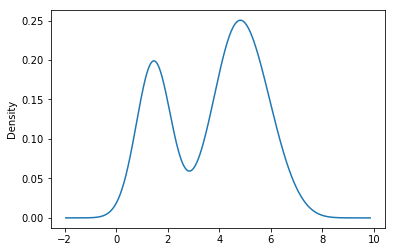

In [12]:
pl = iris['petal_length'].plot.kde()

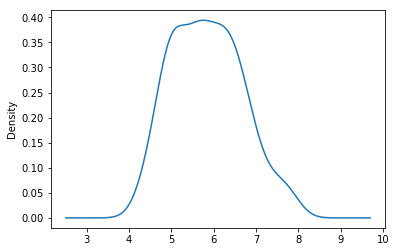

In [13]:
sl = iris['sepal_length'].plot.kde()

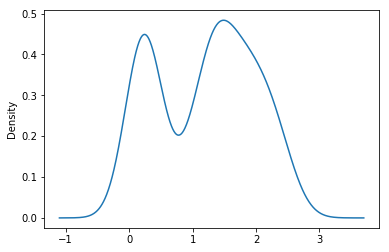

In [14]:
pw = iris['petal_width'].plot.kde()

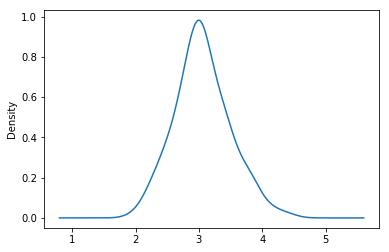

In [15]:
sw = iris['sepal_width'].plot.kde()

#### Conditional Feature Distribution

We can build kde plots also by grouping values of a same feature w.r.t. a categorical variable.

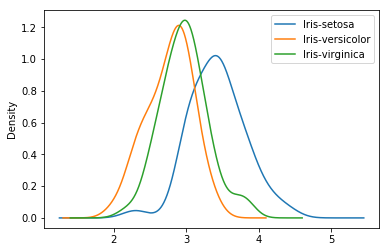

In [16]:
ax = iris.groupby(['class']).sepal_width.plot.kde()
plt.legend()
plt.show()

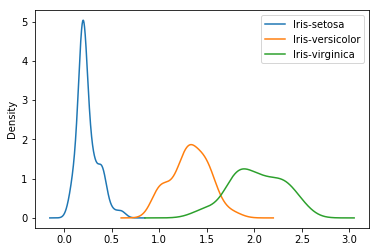

In [17]:
ax = iris.groupby(['class']).petal_width.plot.kde()
plt.legend()
plt.show()

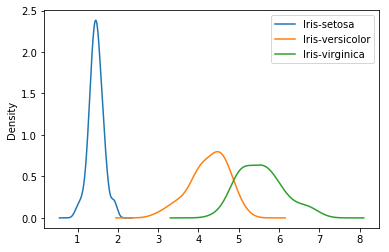

In [18]:
ax = iris.groupby(['class']).petal_length.plot.kde()
plt.legend()
plt.show()

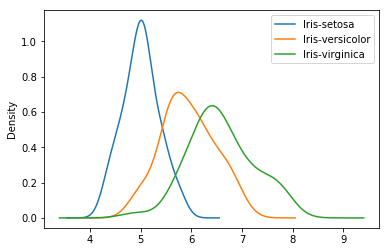

In [19]:
ax = iris.groupby(['class']).sepal_length.plot.kde()
plt.legend()
plt.show()

### 3.B Histogram plot
We can also use Histograms instead of kde to capture binned class distribution.

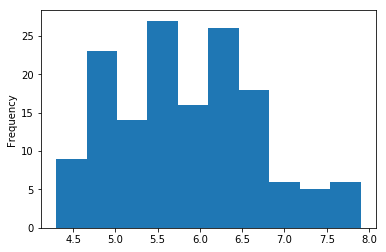

In [20]:
sx = iris.sepal_length.plot.hist(bins=10)

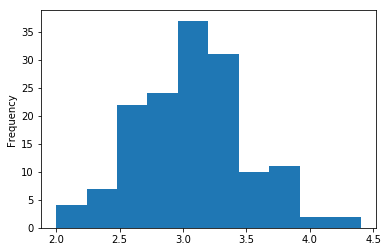

In [21]:
sx = iris.sepal_width.plot.hist(bins=10)

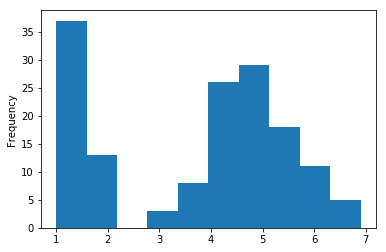

In [22]:
sx = iris.petal_length.plot.hist(bins=10)

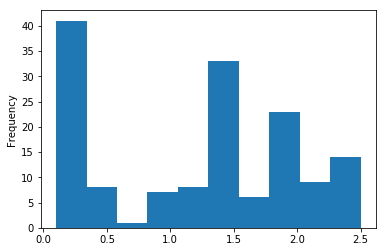

In [23]:
sx = iris.petal_width.plot.hist(bins=10)

#### (Conditional, Stacked) histograms
Pandas does not have a simple way to visualise conditional histograms. <br/> 
To overcome such issue we can define a dedicated function as follows:

In [24]:
def conditional_histogram(df, column):

    booldf1 = pd.DataFrame(df[df['class_code']==0][column])
    booldf1.columns = ['Setosa']
    booldf2 = pd.DataFrame(df[df['class_code']==1][column])
    booldf2.columns = ['Versicolor']
    booldf3 = pd.DataFrame(df[df['class_code']==2][column])
    booldf3.columns = ['Virginica']
    row_concat = pd.concat([booldf1, booldf2, booldf3], axis=1)

    ax = row_concat.plot.hist(stacked=True, alpha=0.6)
    ax.set_xlabel(column)

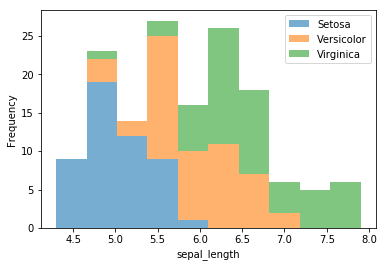

In [25]:
conditional_histogram(iris, "sepal_length")

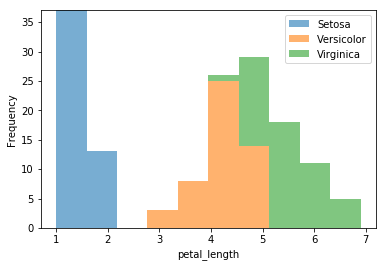

In [26]:
conditional_histogram(iris, "petal_length")

### 3.C Bar charts
Conversely from histograms (used to plot quantitative data with ranges of the data grouped into bins or intervals), bar charts plot categorical data.

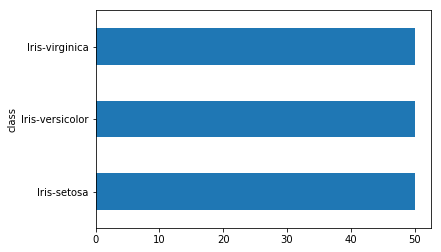

In [27]:
sx = iris.groupby(['class']).petal_length.count().plot.barh()

### 3.D Dispersion and Outliers

Box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.

Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution. The spacings between the different parts of the box indicate the degree of dispersion (spread) and skewness in the data, and show outliers.

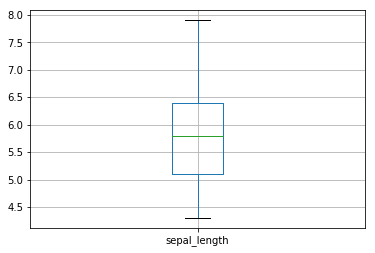

In [28]:
sl_box = iris.boxplot(['sepal_length'], showfliers=True)

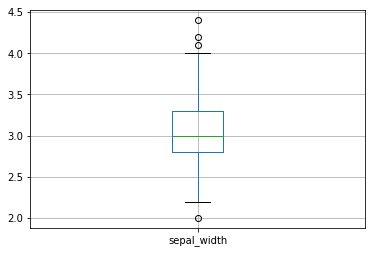

In [29]:
sw_box = iris.boxplot(['sepal_width'], showfliers=True)

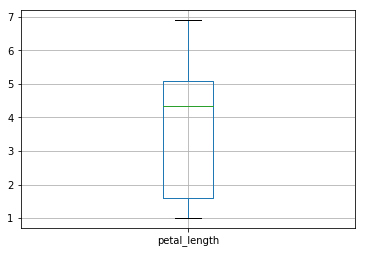

In [30]:
pl_box = iris.boxplot(['petal_length'], showfliers=True)

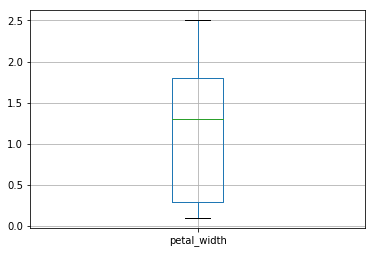

In [31]:
pw_box = iris.boxplot(['petal_width'], showfliers=True)

#### Conditional box plots

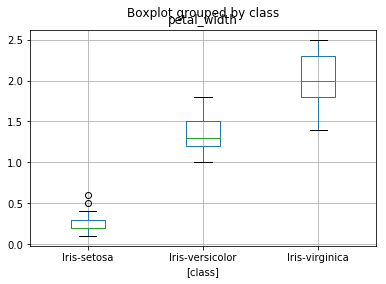

In [32]:
pw_by_class = iris.boxplot(['petal_width'], by=['class'])

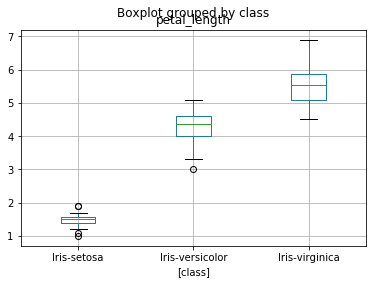

In [33]:
pl_by_class = iris.boxplot(['petal_length'], by=['class'])

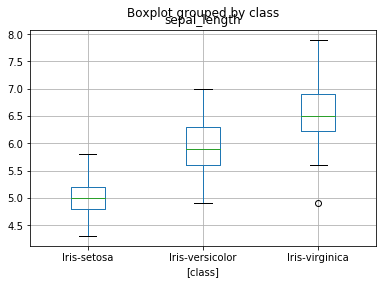

In [34]:
sl_by_class = iris.boxplot(['sepal_length'], by=['class'])

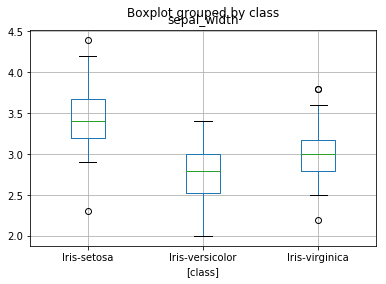

In [35]:
sw_by_class = iris.boxplot(['sepal_width'], by=['class'])

## 4. Correlations

A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationships between two variables.

Several types of correlation coefficients exist, each with their own definition and own range of usability and characteristics. They have in common that they assume values in the range from −1 to +1, where +1 indicates the strongest possible agreement and −1 the strongest possible disagreement. By default Pandas adopts Pearson correlation.

In [36]:
iris = iris.drop(['New_Column', 'sepal_length_bin', 'sepal_width_bin'], axis=1)

#### Correlation matrix

The correlation matrix computes the Pearson correlation coefficients of the columns of a matrix. That is, row i and column j of the correlation matrix is the correlation between column i and column j of the original matrix. Note that the diagonal elements of the correlation matrix will be 1 (since they are the correlation of a column with itself). The correlation matrix is also symmetric since the correlation of column i with column j is the same as the correlation of column j with column i.

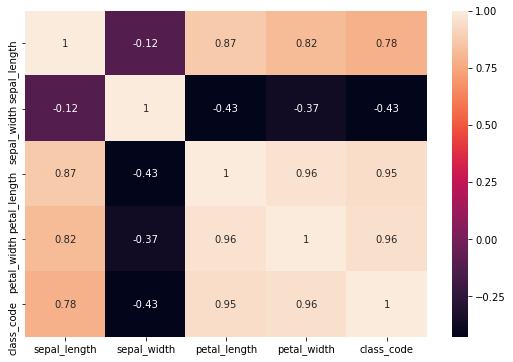

In [44]:
import seaborn as sns
corr = iris.corr()
plt.subplots(figsize =(9, 6))
hm = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

#### Scatter plots

A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

In [38]:
from pandas.plotting import scatter_matrix

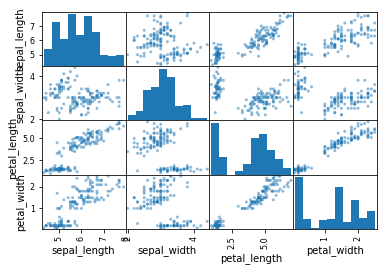

In [39]:
sm = scatter_matrix(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

Scatter plots can be also generated individually

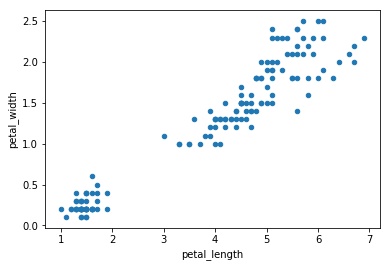

In [41]:
af = iris.plot.scatter(x='petal_length', y='petal_width')